# 等高線を書いてみる

In [1]:
import tilemapbase as tmb
import matplotlib.pyplot as plt
import numpy as np
import itertools as it

/usr/local/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful o

In [2]:
tmb.init(create=True)
t = tmb.tiles.build_OSM()

In [3]:
my_office = (139.74947495, 35.66687568)
degree_range = 0.003
extent = tmb.Extent.from_lonlat(
    my_office[0] - degree_range, my_office[0] + degree_range,
    my_office[1] - degree_range, my_office[1] + degree_range
)
extent = extent.to_aspect(1)
extent

Extent((0.8881846526388889,0.3938187783308366)->(0.8882013193055555,0.39383544499750317) projected as normal)

In [4]:
dim = 50
grid_x = np.linspace(extent.xmin, extent.xmax, num=dim)
grid_y = np.linspace(extent.ymin, extent.ymax, num=dim)
x0, y0 = (extent.xmax + extent.xmin)/2, (extent.ymax + extent.ymin)/2
val = np.zeros((dim, dim))
for i,j in it.product(range(dim), range(dim)):
    val[i][j] = np.sqrt((grid_x[j]-x0)**2 + (grid_y[i]-y0)**2)
val

array([[1.17851130e-05, 1.15471056e-05, 1.13143179e-05, ...,
        1.13143179e-05, 1.15471056e-05, 1.17851130e-05],
       [1.15471056e-05, 1.13040880e-05, 1.10661894e-05, ...,
        1.10661894e-05, 1.13040880e-05, 1.15471056e-05],
       [1.13143179e-05, 1.10661894e-05, 1.08230630e-05, ...,
        1.08230630e-05, 1.10661894e-05, 1.13143179e-05],
       ...,
       [1.13143179e-05, 1.10661894e-05, 1.08230630e-05, ...,
        1.08230630e-05, 1.10661894e-05, 1.13143179e-05],
       [1.15471056e-05, 1.13040880e-05, 1.10661894e-05, ...,
        1.10661894e-05, 1.13040880e-05, 1.15471056e-05],
       [1.17851130e-05, 1.15471056e-05, 1.13143179e-05, ...,
        1.13143179e-05, 1.15471056e-05, 1.17851130e-05]])

塗りつぶさない場合

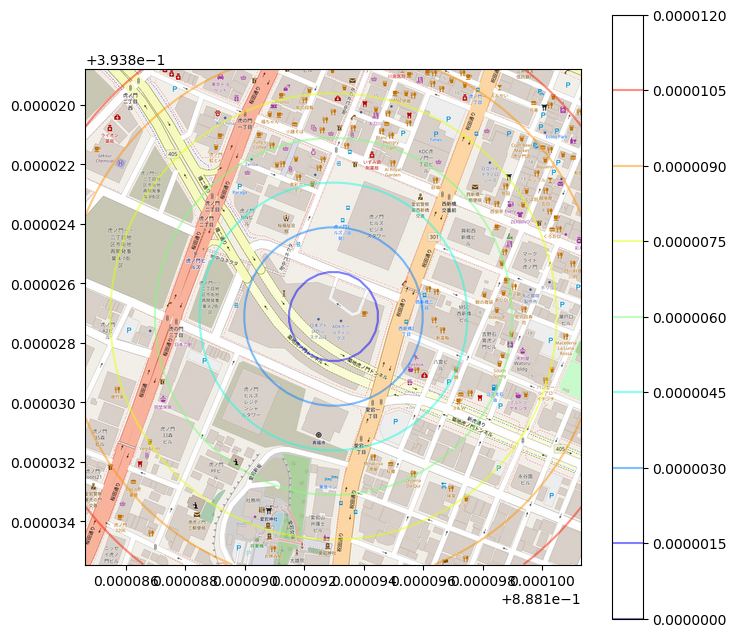

In [5]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

plotter = tmb.Plotter(extent, t, width=600)
plotter.plot(ax, t)

x,y = tmb.project(*my_office)
plot = ax.contour(grid_x, grid_y, val, cmap="jet", alpha=0.5)
fig.colorbar(plot)

塗りつぶす場合（contour->coutourf)

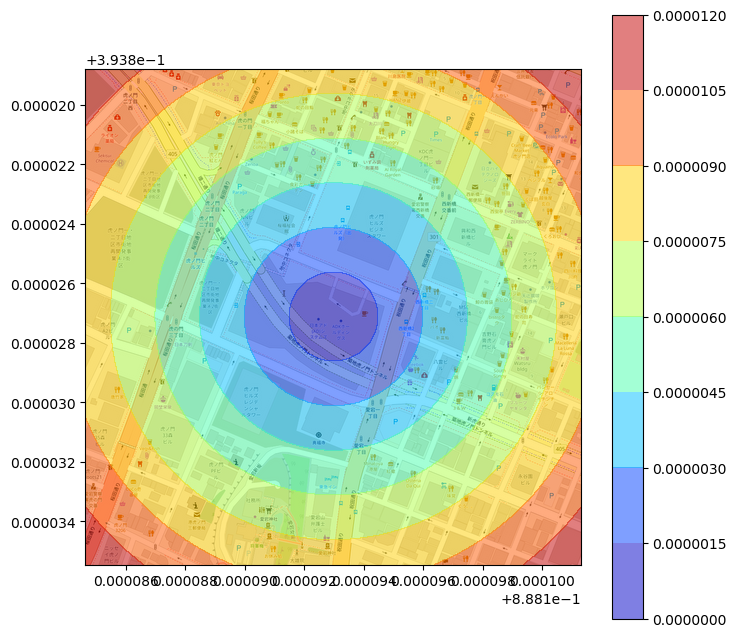

In [6]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

plotter = tmb.Plotter(extent, t, width=600)
plotter.plot(ax, t)

x,y = tmb.project(*my_office)
plot = ax.contourf(grid_x, grid_y, val, cmap="jet", alpha=0.5)
fig.colorbar(plot)